Create a cell for the import statements and magics:

Dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

More technically, At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left; incoming and outgoing edges to a dropped-out node are also removed.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

In [8]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [9]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [17]:
def eval_model (drop):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(drop))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
    return history

In [18]:
def plot_accuracy (history,title):
    
    plt.plot(history.history['acc'], label='Training accuracy')
    plt.plot(history.history['val_acc'], label='Validation accuracy')
    plt.legend()
    plt.title(title)
    plt.show()


In [19]:
def plot_validation(history,title):
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title(title)
    plt.legend()
    plt.show()

In [20]:
def plot_accuracy_all_training (history1,history2,history3,history4):
    
    plt.plot(history1.history['acc'], label='Training accuracy 0.5')
    
    plt.plot(history2.history['acc'], label='Training accuracy 0.2')
        
    plt.plot(history3.history['acc'], label='Training accuracy 0.1')
        
    plt.plot(history4.history['acc'], label='Training accuracy 0.0')
        
    plt.legend()
    plt.title('Accuracy Dropout')
    plt.show()

In [21]:
def plot_accuracy_all_validation (history1,history2,history3,history4):
    
    plt.plot(history1.history['val_acc'], label='Validation accuracy 0.5')
    
    plt.plot(history2.history['val_acc'], label='Validation accuracy 0.2')
    
    plt.plot(history3.history['val_acc'], label='Validation accuracy 0.1')
    
    plt.plot(history4.history['val_acc'], label='Validation accuracy 0.0')
    
    plt.legend()
    plt.title('Accuracy Dropout')

    plt.show()

In [22]:
def plot_validation_all_training (history1,history2,history3,history4):
    plt.plot(history1.history['loss'], label='Training loss 0.5')
    
    plt.plot(history2.history['loss'], label='Training loss 0.2')
        
    plt.plot(history3.history['loss'], label='Training loss 0.1')
      
    plt.plot(history4.history['loss'], label='Training loss 0.0')
    
    plt.title('Loss (cat. cross entropy) Dropout')
    plt.legend()
    plt.show()

In [23]:
def plot_validation_all_validation (history1,history2,history3,history4):

    plt.plot(history1.history['val_loss'], label='Validation loss 0.5')
    

    plt.plot(history2.history['val_loss'], label='Validation loss 0.2')
        
   
    plt.plot(history3.history['val_loss'], label='Validation loss 0.1')
    

    plt.plot(history4.history['val_loss'], label='Validation loss 0.0')
    
    plt.title('Loss (cat. cross entropy) Dropout')
    plt.legend()
    plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 25s - loss: 0.2665 - acc: 0.9220 - val_loss: 0.0820 - val_acc: 0.9760
Epoch 2/20
 - 4s - loss: 0.0931 - acc: 0.9714 - val_loss: 0.0531 - val_acc: 0.9828
Epoch 3/20
 - 4s - loss: 0.0680 - acc: 0.9793 - val_loss: 0.0437 - val_acc: 0.9857
Epoch 4/20
 - 4s - loss: 0.0546 - acc: 0.9831 - val_loss: 0.0387 - val_acc: 0.9863
Epoch 5/20
 - 4s - loss: 0.0482 - acc: 0.9846 - val_loss: 0.0402 - val_acc: 0.9870
Epoch 6/20
 - 4s - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0358 - val_acc: 0.9874
Epoch 7/20
 - 4s - loss: 0.0353 - acc: 0.9887 - val_loss: 0.0355 - val_acc: 0.9880
Epoch 8/20
 - 4s - loss: 0.0307 - acc: 0.9903 - val_loss: 0.0305 - val_acc: 0.9896
Epoch 9/20
 - 4s - loss: 0.0293 - acc: 0.9906 - val_loss: 0.0292 - val_acc: 0.9899
Epoch 10/20
 - 4s - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0286 - val_acc: 0.9901
Epoch 11/20
 - 4s - loss: 0.0220 - acc: 0.9928 - val_loss: 0.0297 - val_acc: 0.9903
Epoch 12/20
 - 4s - loss: 0.0206 -

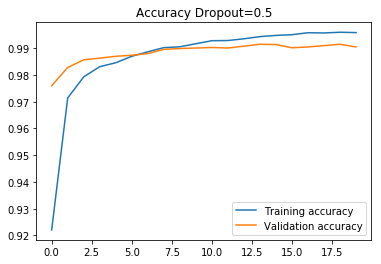

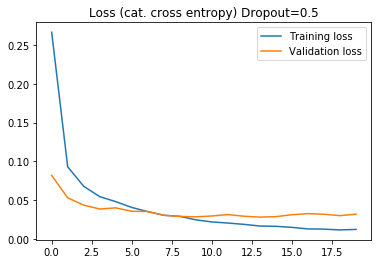

In [24]:
history_05=eval_model (0.5)
plot_accuracy (history_05,'Accuracy Dropout=0.5' )
plot_validation(history_05,'Loss (cat. cross entropy) Dropout=0.5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2529 - acc: 0.9276 - val_loss: 0.0833 - val_acc: 0.9756
Epoch 2/20
 - 4s - loss: 0.0759 - acc: 0.9773 - val_loss: 0.0530 - val_acc: 0.9830
Epoch 3/20
 - 4s - loss: 0.0539 - acc: 0.9832 - val_loss: 0.0431 - val_acc: 0.9838
Epoch 4/20
 - 4s - loss: 0.0439 - acc: 0.9867 - val_loss: 0.0393 - val_acc: 0.9868
Epoch 5/20
 - 4s - loss: 0.0362 - acc: 0.9885 - val_loss: 0.0339 - val_acc: 0.9881
Epoch 6/20
 - 4s - loss: 0.0291 - acc: 0.9907 - val_loss: 0.0373 - val_acc: 0.9885
Epoch 7/20
 - 4s - loss: 0.0245 - acc: 0.9923 - val_loss: 0.0357 - val_acc: 0.9893
Epoch 8/20
 - 4s - loss: 0.0215 - acc: 0.9931 - val_loss: 0.0337 - val_acc: 0.9893
Epoch 9/20
 - 4s - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0391 - val_acc: 0.9864
Epoch 10/20
 - 4s - loss: 0.0158 - acc: 0.9948 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 11/20
 - 4s - loss: 0.0134 - acc: 0.9958 - val_loss: 0.0379 - val_acc: 0.9881
Epoch 12/20
 - 4s - loss: 0.0117 - 

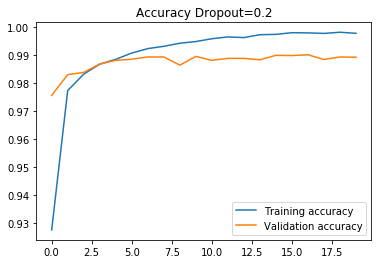

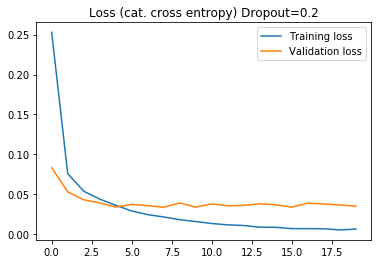

In [25]:
history_02=eval_model (0.2)
plot_accuracy (history_02,'Accuracy Dropout=0.2' )
plot_validation(history_02,'Loss (cat. cross entropy) Dropout=0.2')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.2367 - acc: 0.9334 - val_loss: 0.0701 - val_acc: 0.9793
Epoch 2/20
 - 4s - loss: 0.0679 - acc: 0.9798 - val_loss: 0.0458 - val_acc: 0.9843
Epoch 3/20
 - 4s - loss: 0.0463 - acc: 0.9862 - val_loss: 0.0443 - val_acc: 0.9847
Epoch 4/20
 - 4s - loss: 0.0369 - acc: 0.9888 - val_loss: 0.0381 - val_acc: 0.9875
Epoch 5/20
 - 4s - loss: 0.0291 - acc: 0.9912 - val_loss: 0.0344 - val_acc: 0.9889
Epoch 6/20
 - 4s - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0333 - val_acc: 0.9886
Epoch 7/20
 - 4s - loss: 0.0213 - acc: 0.9930 - val_loss: 0.0321 - val_acc: 0.9900
Epoch 8/20
 - 4s - loss: 0.0159 - acc: 0.9951 - val_loss: 0.0352 - val_acc: 0.9891
Epoch 9/20
 - 4s - loss: 0.0137 - acc: 0.9957 - val_loss: 0.0346 - val_acc: 0.9898
Epoch 10/20
 - 4s - loss: 0.0113 - acc: 0.9966 - val_loss: 0.0393 - val_acc: 0.9875
Epoch 11/20
 - 4s - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0323 - val_acc: 0.9911
Epoch 12/20
 - 4s - loss: 0.0078 - 

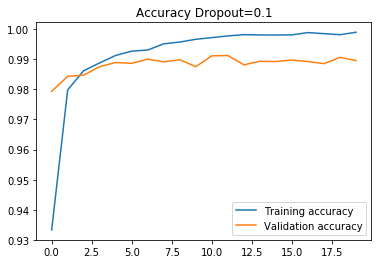

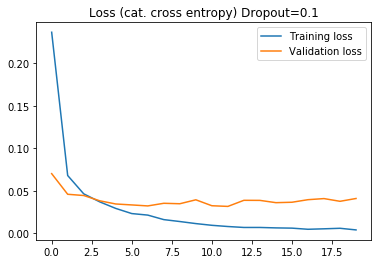

In [26]:
history_01=eval_model (0.1)
plot_accuracy (history_01,'Accuracy Dropout=0.1' )
plot_validation(history_01,'Loss (cat. cross entropy) Dropout=0.1')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 3s - loss: 0.2396 - acc: 0.9325 - val_loss: 0.0877 - val_acc: 0.9735
Epoch 2/20
 - 3s - loss: 0.0685 - acc: 0.9798 - val_loss: 0.0587 - val_acc: 0.9810
Epoch 3/20
 - 3s - loss: 0.0466 - acc: 0.9862 - val_loss: 0.0419 - val_acc: 0.9864
Epoch 4/20
 - 3s - loss: 0.0354 - acc: 0.9893 - val_loss: 0.0464 - val_acc: 0.9851
Epoch 5/20
 - 3s - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0398 - val_acc: 0.9856
Epoch 6/20
 - 3s - loss: 0.0222 - acc: 0.9933 - val_loss: 0.0362 - val_acc: 0.9866
Epoch 7/20
 - 3s - loss: 0.0181 - acc: 0.9942 - val_loss: 0.0369 - val_acc: 0.9875
Epoch 8/20
 - 3s - loss: 0.0140 - acc: 0.9959 - val_loss: 0.0358 - val_acc: 0.9898
Epoch 9/20
 - 3s - loss: 0.0115 - acc: 0.9965 - val_loss: 0.0385 - val_acc: 0.9870
Epoch 10/20
 - 3s - loss: 0.0090 - acc: 0.9975 - val_loss: 0.0384 - val_acc: 0.9879
Epoch 11/20
 - 3s - loss: 0.0073 - acc: 0.9979 - val_loss: 0.0326 - val_acc: 0.9892
Epoch 12/20
 - 3s - loss: 0.0062 - 

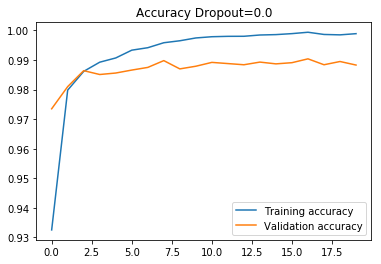

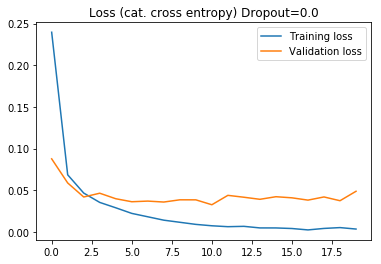

In [27]:
history_00=eval_model (0.0)
plot_accuracy (history_00,'Accuracy Dropout=0.0' )
plot_validation(history_00,'Loss (cat. cross entropy) Dropout=0.0')

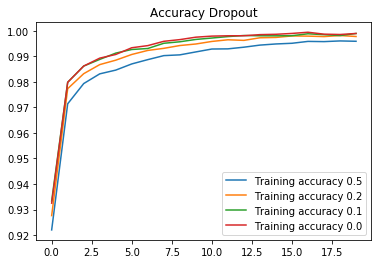

In [28]:
plot_accuracy_all_training(history_05,history_02,history_01,history_00)

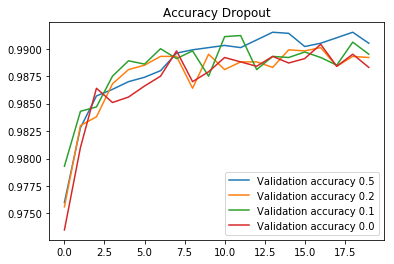

In [29]:
plot_accuracy_all_validation(history_05,history_02,history_01,history_00)

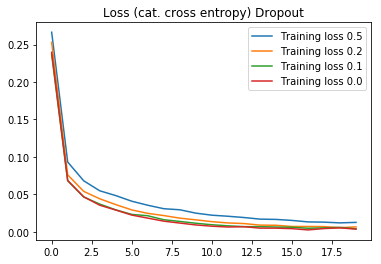

In [30]:
plot_validation_all_training(history_05,history_02,history_01,history_00)

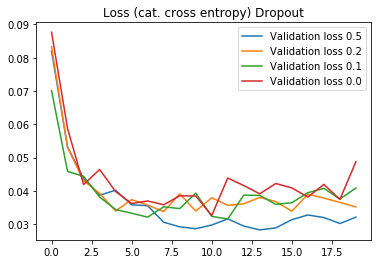

In [31]:
plot_validation_all_validation(history_05,history_02,history_01,history_00)

Training Phase:
Training Phase: For each hidden layer, for each training sample, for each iteration, ignore (zero out) a random fraction, p, of nodes (and corresponding activations).

Testing Phase:
Use all activations, but reduce them by a factor p (to account for the missing activations during training).

Some Observations:
    
1. Dropout forces a neural network to learn more robust features that are useful 
in conjunction with many different random subsets of the other neurons.

2. Dropout roughly doubles the number of iterations required to converge. However, training time for each epoch is less.


From the above graphs we can conclude that with increasing the dropout, there is some increase in validation accuracy and decrease in loss initially before the trend starts to go down